# Perform EDA on Printify Data Gathered

In [1]:
import pandas as pd
import numpy as np
import time
import collections
import plotly.graph_objects as go
import plotly.express as px

In [20]:
# Read the printify products excel file into pandas dataframe
products = pd.read_excel('printify_products.xlsx')
products.head()

,Description,Brand providers,Floor_price,Premium_Floor_price,Customizations,Tags
0,Oven Mitts & Pot Holders,By Generic brand,From USD 24.93,From USD 19.20 with Printify Premium,1 size1 colorArtsAdd,New
1,"Tripod Lamp with High-Res Printed Shade, US\CA...",By Generic brand,From USD 37.31,From USD 28.74 with Printify Premium,1 size1 colorLamp In a Box,New
2,Heart-Shaped Mug,By Generic brand,From USD 13.91,From USD 10.71 with Printify Premium,1 size1 colorOPT OnDemand,New
3,Passport Cover,By Generic brand,From USD 13.43,From USD 10.34 with Printify Premium,1 size1 colorPersonalized Luggage,New
4,"Balloon (Round, Heart-Shaped)",By Generic brand,From USD 7.99,From USD 6.15 with Printify Premium,1 size1 colorPhoto Balloon Store,New


In [21]:
brands = pd.read_excel('printify_brands.xlsx')
brands.head()

,Brand,Description,# of Products
0,Alstyle,Alstyle Apparel & Activewear is an industry le...,1 product
1,American Apparel,"Passion, innovation & ethical practices for th...",1 product
2,Anvil,"Anvil labels, perfect for ultimate customizati...",1 product
3,Arctic Zone,"In 1986, when we began under the California In...",1 product
4,AS Colour,AS Colour is a New Zealand based manufacturer ...,10 products


In [22]:
printers = pd.read_excel('printify_products.xlsx')
printers.head()

,Description,Brand providers,Floor_price,Premium_Floor_price,Customizations,Tags
0,Oven Mitts & Pot Holders,By Generic brand,From USD 24.93,From USD 19.20 with Printify Premium,1 size1 colorArtsAdd,New
1,"Tripod Lamp with High-Res Printed Shade, US\CA...",By Generic brand,From USD 37.31,From USD 28.74 with Printify Premium,1 size1 colorLamp In a Box,New
2,Heart-Shaped Mug,By Generic brand,From USD 13.91,From USD 10.71 with Printify Premium,1 size1 colorOPT OnDemand,New
3,Passport Cover,By Generic brand,From USD 13.43,From USD 10.34 with Printify Premium,1 size1 colorPersonalized Luggage,New
4,"Balloon (Round, Heart-Shaped)",By Generic brand,From USD 7.99,From USD 6.15 with Printify Premium,1 size1 colorPhoto Balloon Store,New


In [23]:
# Fix the price columns by removing the text
for index, items in enumerate(products['Floor_price']):
    items = items.split(" ")
    price = float(items[-1])
    #print(f"{products.loc[index]['Floor_price']} --> {price}")
    products.loc[index]['Floor_price'] = price  # Replace with cleaned price
    

In [24]:
# Fix the price columns by removing the text
for index, items in enumerate(products['Premium_Floor_price']):
    items = items.split(" ")
    price = float(items[2])
    #print(f"{products.loc[index]['Premium_Floor_price']} --> {price}")
    products.loc[index]['Premium_Floor_price'] = price  # Replace with cleaned price
    

In [25]:
# Confirm price is a number 
products.head(10)

,Description,Brand providers,Floor_price,Premium_Floor_price,Customizations,Tags
0,Oven Mitts & Pot Holders,By Generic brand,24.93,19.2,1 size1 colorArtsAdd,New
1,"Tripod Lamp with High-Res Printed Shade, US\CA...",By Generic brand,37.31,28.74,1 size1 colorLamp In a Box,New
2,Heart-Shaped Mug,By Generic brand,13.91,10.71,1 size1 colorOPT OnDemand,New
3,Passport Cover,By Generic brand,13.43,10.34,1 size1 colorPersonalized Luggage,New
4,"Balloon (Round, Heart-Shaped)",By Generic brand,7.99,6.15,1 size1 colorPhoto Balloon Store,New
5,Soft Picnic Bag,By Generic brand,16.21,12.48,1 size1 colorSmart Printee,New
6,Polyester Car Seat Covers,By Generic brand,38.81,29.89,1 size1 colorSubliminator,New
7,"Standard Mug, 11oz",By ORCA Coatings,5.51,4.24,1 size1 colorTextildruck Europa,New
8,Unisex Twill Hat,By Generic brandCP 80,15.73,12.11,1 size10 colorsMyLocker,Embroidery
9,Knit Beanie,By Generic brandCP 90,14.67,11.3,1 size11 colorsMyLocker,Embroidery


In [26]:
# Clean the Brands column   

for clean_brand in list(brands["Brand"]):
     for index, messy_brand in enumerate(products["Brand providers"]):
            # messy_brand = messy_brand.replace('By','').strip()
            if clean_brand in messy_brand:
                print(f"{products.loc[index]['Brand providers']} --> {clean_brand}")
                products.loc[index]["Brand providers"] = clean_brand
            elif 'Generic' in messy_brand:
                #print(f"{products.loc[index]['Brand providers']} --> Generic Brand")
                products.loc[index]["Brand providers"] = "Generic Brand"
                

By Alstyle1301 --> Alstyle
By Alstyle1301 --> Alstyle
By American Apparel2001W --> American Apparel
By American Apparel2001W --> American Apparel
By Anvil980 --> Anvil
By Arctic Zone --> Arctic Zone
By AS Colour5039 --> AS Colour
By AS Colour4062 --> AS Colour
By AS Colour5039 --> AS Colour
By AS Colour5001 --> AS Colour
By AS Colour5065 --> AS Colour
By AS Colour5101 --> AS Colour
By AS Colour5101 --> AS Colour
By AS Colour5029 --> AS Colour
By AS Colour5025 --> AS Colour
By AS Colour5025 --> AS Colour
By AS Colour5065 --> AS Colour
By AS Colour4028 --> AS Colour
By AS Colour4001 --> AS Colour
By AS Colour5101 --> AS Colour
By AS Colour5101 --> AS Colour
By AS Colour5025 --> AS Colour
By AS Colour4028 --> AS Colour
By AS Colour5025 --> AS Colour
By AS Colour1001 --> AS Colour
By AWDISJH001 --> AWDIS
By AWDISJH050 --> AWDIS
By AWDISJH003 --> AWDIS
By AWDISJH050 --> AWDIS
By AWDISJH030 --> AWDIS
By AWDISJH001 --> AWDIS
By AWDISJH001F --> AWDIS
By AWDISJH050 --> AWDIS
By AWDISJH003 --> A

In [27]:
# Confirm brand is okay 
products.head(10)

,Description,Brand providers,Floor_price,Premium_Floor_price,Customizations,Tags
0,Oven Mitts & Pot Holders,Generic Brand,24.93,19.2,1 size1 colorArtsAdd,New
1,"Tripod Lamp with High-Res Printed Shade, US\CA...",Generic Brand,37.31,28.74,1 size1 colorLamp In a Box,New
2,Heart-Shaped Mug,Generic Brand,13.91,10.71,1 size1 colorOPT OnDemand,New
3,Passport Cover,Generic Brand,13.43,10.34,1 size1 colorPersonalized Luggage,New
4,"Balloon (Round, Heart-Shaped)",Generic Brand,7.99,6.15,1 size1 colorPhoto Balloon Store,New
5,Soft Picnic Bag,Generic Brand,16.21,12.48,1 size1 colorSmart Printee,New
6,Polyester Car Seat Covers,Generic Brand,38.81,29.89,1 size1 colorSubliminator,New
7,"Standard Mug, 11oz",ORCA Coatings,5.51,4.24,1 size1 colorTextildruck Europa,New
8,Unisex Twill Hat,Generic Brand,15.73,12.11,1 size10 colorsMyLocker,Embroidery
9,Knit Beanie,Generic Brand,14.67,11.3,1 size11 colorsMyLocker,Embroidery


In [28]:
# Confirm that brands in products are all in brands table
# Add one to the brands for the generic brand

print(f"In Brands: {len(brands['Brand']) + 1} \nIn Products: {len(products['Brand providers'].unique())}")

In Brands: 46 
In Products: 46


In [29]:
products1 = products[['Brand providers']]
brands_count = pd.DataFrame(index= products1['Brand providers'].unique(), columns=['Count'])
for br in brands_count.index:
    brands_count.loc[br] = int(products1[products1['Brand providers']== br].count())


In [30]:
brands_count

,Count
Generic Brand,521
ORCA Coatings,7
Westford Mill®,1
Sport-Tek,4
Colortone,1
Gildan,49
AS Colour,19
Stanley Stella,42
Next Level,11
LAT Apparel,3


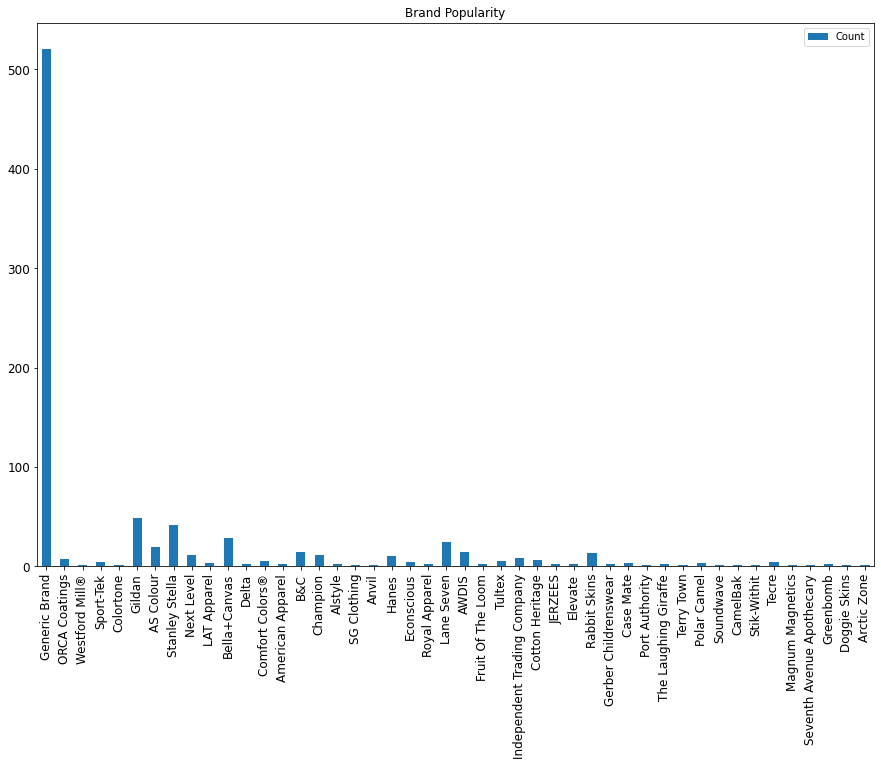

In [31]:
# Brand popularity

ax = brands_count.plot.bar(title ="Brand Popularity", figsize=(15, 10), legend=True, fontsize=12)

In [32]:
brands_count.drop('Generic Brand', inplace=True)

<AxesSubplot:title={'center':'Brand Popularity'}>

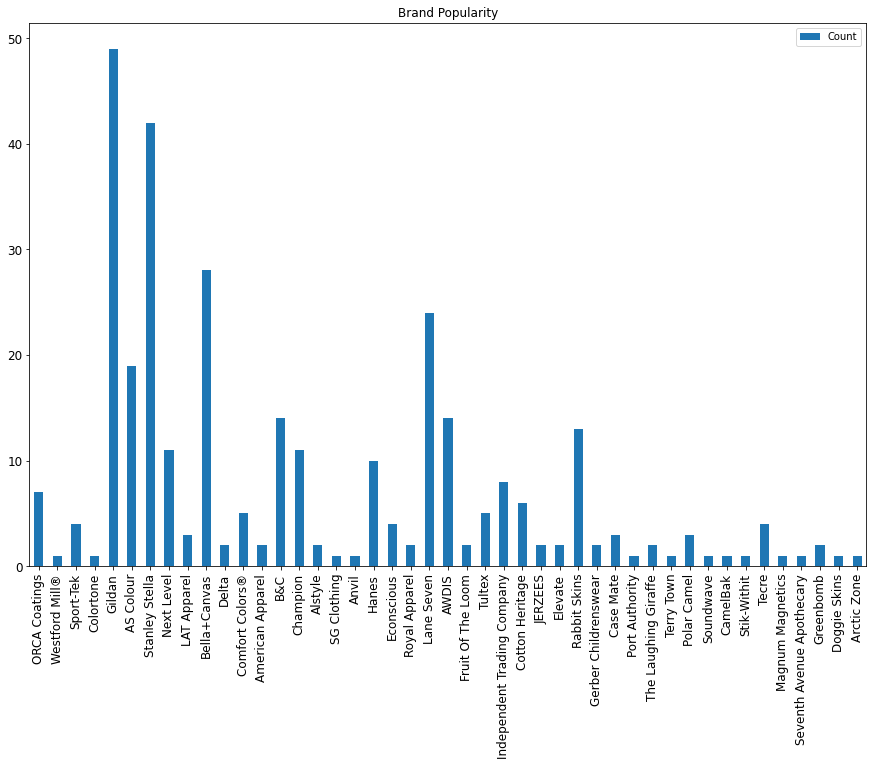

In [33]:
#Same as above without the Generic brand data
brands_count.plot.bar(title ="Brand Popularity", figsize=(15, 10), legend=True, fontsize=12)

In [34]:
# Removed the Generic Brand due to imbalance
# Plotted in plottly which is iteractive
fig = go.Figure(go.Bar(
            x=brands_count.index,
            y=brands_count['Count'],
            orientation='v', width=1))

fig.show()

In [58]:
products2 = products[['Brand providers','Floor_price']]
brands_count2 = pd.DataFrame(index= products['Brand providers'].unique(), columns=["Average_price"])
for br in brands_count2.index:
    brands_count2.loc[br] = products2[products2['Brand providers'] == br].Floor_price.mean()
brands_count2

,Average_price
Generic Brand,19.097505
ORCA Coatings,7.635714
Westford Mill®,11.72
Sport-Tek,31.755
Colortone,19.27
Gildan,16.693878
AS Colour,21.080526
Stanley Stella,27.034524
Next Level,13.504545
LAT Apparel,17.113333


In [63]:
fig = go.Figure(go.Bar(
            x=brands_count2.index,
            y=brands_count2['Average_price'],
            orientation='v', width=0.9))

fig.show()

<AxesSubplot:title={'center':'Brand Popularity'}>

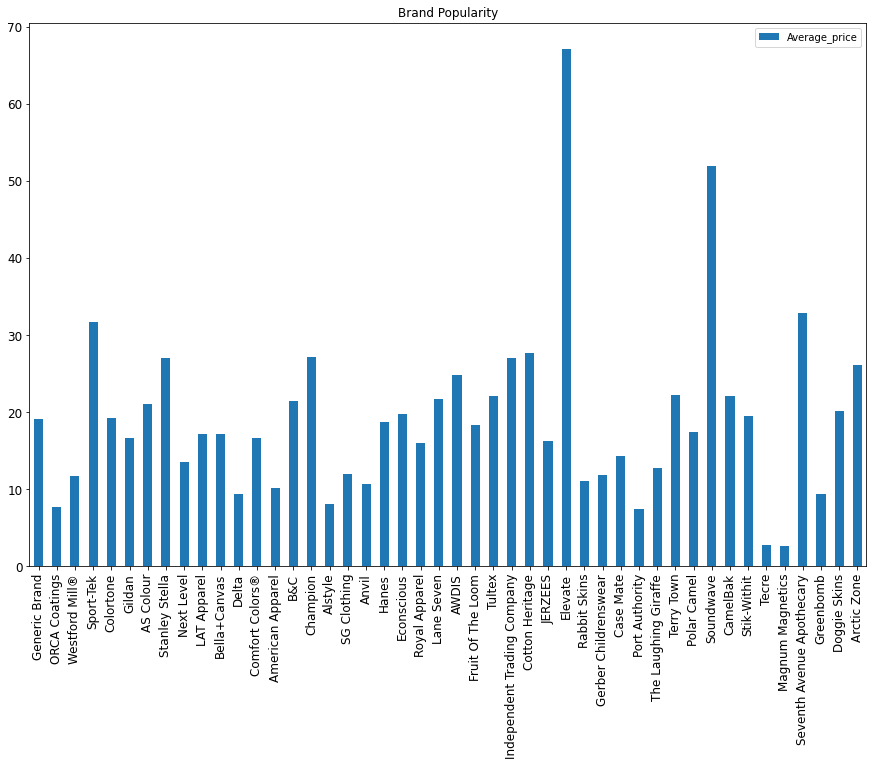

In [64]:
# Average price of every brand on Printify
brands_count2.plot.bar(title ="Brand Popularity", figsize=(15, 10), legend=True, fontsize=12)